<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#Изучение-файлов" data-toc-modified-id="Изучение-файлов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучение файлов</a></span></li><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Проверка-правильности-расчётов-эффективности-обогащения" data-toc-modified-id="Проверка-правильности-расчётов-эффективности-обогащения-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Проверка правильности расчётов эффективности обогащения</a></span></li><li><span><a href="#Анализ-отсутствующих-признаков" data-toc-modified-id="Анализ-отсутствующих-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Анализ отсутствующих признаков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Золото" data-toc-modified-id="Золото-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Золото</a></span></li><li><span><a href="#Серебро" data-toc-modified-id="Серебро-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Серебро</a></span></li><li><span><a href="#Свинец" data-toc-modified-id="Свинец-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Свинец</a></span></li><li><span><a href="#Сравнение-распределений" data-toc-modified-id="Сравнение-распределений-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сравнение распределений</a></span></li><li><span><a href="#Исследование-сумарной-концентрации" data-toc-modified-id="Исследование-сумарной-концентрации-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Исследование сумарной концентрации</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-sMAPE." data-toc-modified-id="Функция-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция sMAPE.</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li></ul></li><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Данные находятся в трёх файлах:<br>

1. gold_recovery_train_new.csv — обучающая выборка;
2. gold_recovery_test_new.csv — тестовая выборка;
3. gold_recovery_full_new.csv — исходные данные.

## Подготовка данных

### Импорты

In [1]:
from sklearn.linear_model import LinearRegression
from math import sqrt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyRegressor

### Изучение файлов

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col = 'date', parse_dates = ['date'])
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col = 'date', parse_dates = ['date'])
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col = 'date', parse_dates = ['date'])

In [3]:
train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [4]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [5]:
test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [6]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

Как же тут много всего. Начну с пропусков. <br>
В тестовой и тренировочных выборках их просто удалим. <br>
В полной трогать не будем. В строках с пропусками окажутся полезные данные, как научил меня позже горький опыт :)

### Работа с пропусками

Заполним пропуски предыдущими значениями, вспоминив условие о приблизительном равенстве "соседних" показателей.

In [7]:
test = test.ffill(axis = 0)
train = train.ffill(axis = 0)

### Проверка правильности расчётов эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery

In [8]:
def recovery_calc(output, before, tail):
    numerator = output * (before - tail)
    denominator = before * (output - tail)
    return (numerator / denominator) * 100

Помечаю для себя что есть что. <br>
rougher.input.feed_au = before <br>
rougher.output.concentrate_au = output <br> 
rougher.output.tail_au = tail <br>

In [9]:
check = recovery_calc(train['rougher.output.concentrate_au'], train['rougher.input.feed_au'], 
                      train['rougher.output.tail_au'])

Найдём MAE между расчётами и значением признака. 

In [10]:
print('Значение MAE:', mean_absolute_error(train['rougher.output.recovery'], check))

Значение MAE: 9.73512347450521e-15


Значение MAE стремится к нулю, поэтому считаем, что эффективность обогащения посчитана правильно. 

### Анализ отсутствующих признаков

Проанализируем признаки, недоступные в тестовой выборке. Посмотрим, что это вообще за признаки.

In [11]:
missing_columns = train.drop(test.columns, axis = 1)

In [12]:
missing_columns.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Ага, значит, в тестовой выборке избавились от выходных данных по концентрации металлов на всех этапах, флотационных установок 10 и 11 и целевых признаков. Целевые признаки нам ещё понадобятся, а вот модель мы, похоже, будем учить без остальных данных.

In [13]:
missing_columns = missing_columns.drop(["final.output.recovery","rougher.output.recovery"], axis = 1)
train = train.drop(missing_columns.columns, axis = 1)

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

### Золото

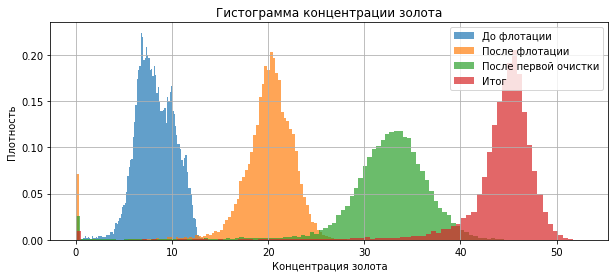

In [14]:
full['rougher.input.feed_au'].hist(bins = 100, density = 'True', label = 'До флотации', alpha = 0.7, figsize = (10, 4))
full['rougher.output.concentrate_au'].hist(bins = 100, density = 'True', label = 'После флотации', alpha = 0.7)
full['primary_cleaner.output.concentrate_au'].hist(bins = 100, density = 'True', label = 'После первой очистки', alpha = 0.7)
full['final.output.concentrate_au'].hist(bins = 100, density = 'True', label = 'Итог', alpha = 0.7)

plt.xlabel('Концентрация золота')
plt.ylabel('Плотность')
plt.title('Гистограмма концентрации золота')
plt.legend()
plt.show()

### Серебро

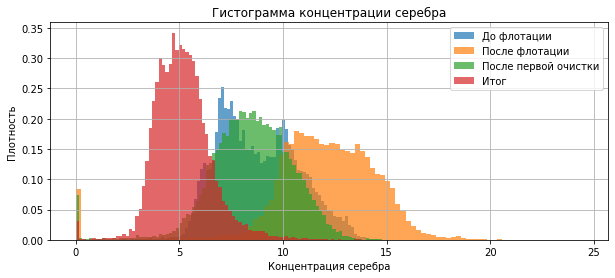

In [15]:
full['rougher.input.feed_ag'].hist(bins = 100, density = 'True', label = 'До флотации', alpha = 0.7, figsize = (10, 4))
full['rougher.output.concentrate_ag'].hist(bins = 100, density = 'True', label = 'После флотации', alpha = 0.7)
full['primary_cleaner.output.concentrate_ag'].hist(bins = 100, density = 'True', label = 'После первой очистки', alpha = 0.7)
full['final.output.concentrate_ag'].hist(bins = 100, density = 'True', label = 'Итог', alpha = 0.7)

plt.xlabel('Концентрация серебра')
plt.ylabel('Плотность')
plt.title('Гистограмма концентрации серебра')
plt.legend()
plt.show()

### Свинец

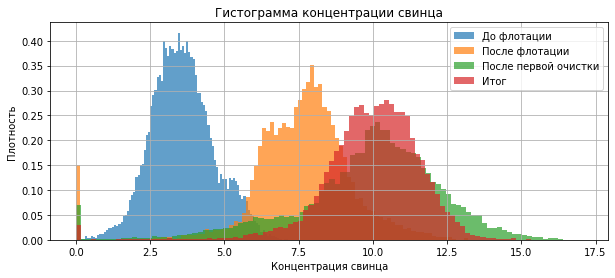

In [16]:
full['rougher.input.feed_pb'].hist(bins = 100, density = 'True', label = 'До флотации', alpha = 0.7, figsize = (10, 4))
full['rougher.output.concentrate_pb'].hist(bins = 100, density = 'True', label = 'После флотации', alpha = 0.7)
full['primary_cleaner.output.concentrate_pb'].hist(bins = 100, density = 'True', label = 'После первой очистки', alpha = 0.7)
full['final.output.concentrate_pb'].hist(bins = 100, density = 'True', label = 'Итог', alpha = 0.7)

plt.xlabel('Концентрация свинца')
plt.ylabel('Плотность')
plt.title('Гистограмма концентрации свинца')
plt.legend()
plt.show()

Как видно из гистограмм, доля золота растёт после каждой операции. Значит, процесс работает, ура! <br>
Доля серебра падает, а свинца - наоборот растёт. Не владею достаточными знаниями для квалифицированной оценки данного результата. Так что просто отметим закономерность.  

### Сравнение распределений

Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.

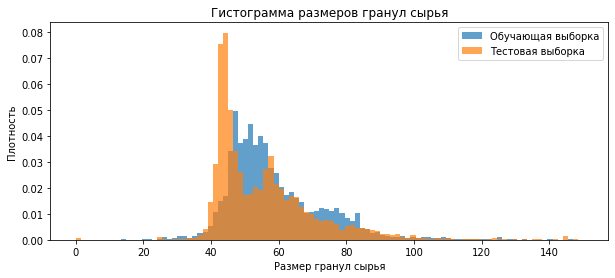

In [17]:
train['rougher.input.feed_size'].hist(bins = 100, 
                                      density = 'True', alpha = 0.7,
                                      label = 'Обучающая выборка', 
                                      grid = False, figsize = (10, 4), range = (0, 150))
test['rougher.input.feed_size'].hist(bins = 100, 
                                     density = 'True', alpha = 0.7,
                                     label = 'Тестовая выборка', 
                                     grid = False, figsize = (10, 4), range = (0, 150))

plt.xlabel('Размер гранул сырья')
plt.ylabel('Плотность')
plt.title('Гистограмма размеров гранул сырья')
plt.legend()
plt.show()

Отличия распределений незначительны, так что оценка модели должна получиться правильной. <br>

### Исследование сумарной концентрации

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [18]:
summary = pd.DataFrame()
summary['before'] = full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] + full['rougher.input.feed_sol'] + full['rougher.input.feed_au']
summary['rough'] = full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + full['rougher.output.concentrate_sol'] + full['rougher.output.concentrate_au']
summary['final'] = full['final.output.concentrate_ag'] + full['final.output.concentrate_pb'] + full['final.output.concentrate_sol'] + full['final.output.concentrate_au']

Проверим получившийся датафрейм на аномальные значения. За аномальные берём значения стремящиеся к нулю на любом из этапов.

In [19]:
sus = summary[(summary['before'] == 0) | (summary['rough'] < 1) | (summary['final'] < 1)]
sus.head(10)

,before,rough,final
date,,,
2016-01-16 21:00:00,58.602038,0.000000,66.175996
2016-01-16 22:00:00,59.921613,0.000000,66.794250
2016-01-16 23:00:00,NaN,0.000000,67.572604
2016-01-17 00:00:00,25.352358,0.000000,NaN
2016-01-17 02:00:00,40.721375,0.000000,NaN
2016-01-17 03:00:00,55.655402,0.000000,64.562895
2016-01-17 04:00:00,57.840604,0.000000,65.997201
2016-02-13 11:00:00,46.703740,56.574778,0.000000
2016-02-18 20:00:00,65.736700,0.000000,66.105788


Отлично, осталось удалить эти индексы из тренировочной и тестовой выборок.

In [20]:
train.drop(sus.index, inplace = True, errors='ignore')
test.drop(sus.index, inplace = True, errors='ignore')

Можно приступать к моделированию.

## Модель

### Функция sMAPE.

Напишем функцию для вычисления итоговой sMAPE.

In [21]:
def smape_calc(target, predictions):
    smape = (np.sum(abs(target - predictions) / (abs(target) + abs(predictions) / 2)) / len(target)) * 100
    return smape

def final_smape_calc(target, predictions):
    target_rough = target.iloc[:, 1]
    target_final = target.iloc[:, 0]
    
    pred_rough = predictions[:, 1]
    pred_final = predictions[:, 0]
    
    return 0.25 * smape_calc(target_rough, pred_rough) + 0.75 * smape_calc(target_final, pred_final)

Сделаем свой скорер.

In [22]:
smape_scorer = make_scorer(final_smape_calc, greater_is_better = False)

### Обучение моделей

Обозначим признаки для тренировочной и тестовой выборки. <br>
Тестовая выборка по факту является features_test, поэтому её я трогать не буду.

#### LinearRegression

In [23]:
features_train = train.drop(['final.output.recovery', 'rougher.output.recovery'], axis = 1)
target_train = train[{'final.output.recovery', 'rougher.output.recovery'}]

target_test = full.loc[test.index, ['final.output.recovery', 'rougher.output.recovery']]

In [24]:
linear_model = LinearRegression().fit(features_train, target_train)
predicted_train = linear_model.predict(features_train)   

In [25]:
scores = cross_val_score(linear_model, features_train, target_train, cv=5, scoring=smape_scorer) 
final_linear_score = (sum(scores) / len(scores)) * -1
print('Средняя оценка sMAPE для LinearRegression:', final_linear_score)

Средняя оценка sMAPE для LinearRegression: 6.764227615950951


#### RandomForestRegressor

In [26]:
best_result = 100000
best_depth = 0
best_est = 0

for est in range(10, 41, 10):
    for depth in range (1, 11, 2):
        model = RandomForestRegressor(random_state = 12345, n_estimators = est, max_depth = depth)
        model.fit(features_train, target_train) 
        predicted_train = model.predict(features_train)
        scores = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer) 
        final_score = (sum(scores) / len(scores)) * -1
        if final_score < best_result:
            best_result = final_score
            best_est = est
            best_depth = depth

print('Лучший результат:', best_result, 'с глубиной', best_depth, "и количеством оценщиков", best_est)

Лучший результат: 6.0062842073947404 с глубиной 3 и количеством оценщиков 30


#### DecisionTreeRegressor

In [27]:
best_result = 100000
best_depth = 0

for depth in range (1, 21):
    model = DecisionTreeRegressor(random_state = 12345, max_depth = depth)
    model.fit(features_train, target_train) 
    predicted_train = model.predict(features_train)
    scores = cross_val_score(model, features_train, target_train, cv=5, scoring=smape_scorer) 
    final_score = (sum(scores) / len(scores)) * -1
    if final_score < best_result:
        best_result = final_score
        best_depth = depth

print('Лучший результат:', best_result, 'с глубиной', best_depth)

Лучший результат: 6.123025924569117 с глубиной 1


### Проверка на тестовой выборке

При данном прогоне ноутбука лучший результат показала модель RandomForestRegressor с глубиной 7 и количеством оценщиков 20. <br>
Проверим её на тестовой выборке.

In [28]:
model = RandomForestRegressor(random_state = 12345, n_estimators = 5, max_depth = 10).fit(features_train, target_train)
predicted_test = model.predict(test)

print('sMAPE для тестовой выборки:', final_smape_calc(target_test, predicted_test))

sMAPE для тестовой выборки: 5.478869034059869


Неплохо, но для оценки адекватности сравним данный результат с дамми-моделью.

In [29]:
dummy = DummyRegressor(strategy='mean').fit(features_train, target_train)
dummy_pred = dummy.predict(test)

dummy2 = DummyRegressor(strategy='median').fit(features_train, target_train)
dummy_pred2 = dummy2.predict(test)

print('sMAPE для дамми модели (mean): ', final_smape_calc(target_test, dummy_pred))
print('sMAPE для дамми модели (median): ', final_smape_calc(target_test, dummy_pred2))

sMAPE для дамми модели (mean):  5.213550353753
sMAPE для дамми модели (median):  4.959868215874579


Победа. sMAPE дамми моделей больше, чем обученной.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [X]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке выполнения
- [X]  Выполнен шаг 1: данные подготовлены
    - [X]  Проверена формула вычисления эффективности обогащения
    - [X]  Проанализированы признаки, недоступные в тестовой выборке
    - [X]  Проведена предобработка данных
- [X]  Выполнен шаг 2: данные проанализированы
    - [X]  Исследовано изменение концентрации элементов на каждом этапе
    - [X]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [X]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке

# Выводы

В рамках проекта подготовлен прототип модели машинного обучения для «Цифры». <br>
Изучены входные данные, проведена работа с пропусками. Проверен расчёт эффективности в исходных данных. Получившаяся MAE оказалась близка к 0.

Проанализирована концентрация металлов на разных этапах очистки. Как видно из гистограмм, доля золота растёт после каждой операции. Доля серебра падает, а свинца - наоборот растёт. <br>

Произведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. Отличия  незначительны, так что оценка модели получились правильными. <br>

Исследована суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Аномальные наблюдения - близкие к нулю на одном из этапов - убраны из обучающей и тестовой выборок. <br>

Обучены 3 модели, показавшие следующие средние значения sMAPE при использовании метода кросс-валидации: <br>
LinearRegression - 5.47 <br>
RandomForestRegressor - 5.06 <br>
DecisionTreeRegressor - 5.20 <br>

RandomForestRegressor оказалась лучшей. Проведено тестирование на соответствующей выборке. sMAPE - 14.8.